# Import libraries

In [1]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Load dataset

In [2]:
data_df = pd.read_csv('CREDIT_CARD_DATA.csv')

In [3]:
data_df.shape

(8950, 18)

In [4]:
data_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data_df[data_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
data_df['CASH_ADVANCE'].max()

47137.211760000006

In [9]:
data_df[data_df['CASH_ADVANCE'] <= 50000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data Cleaning

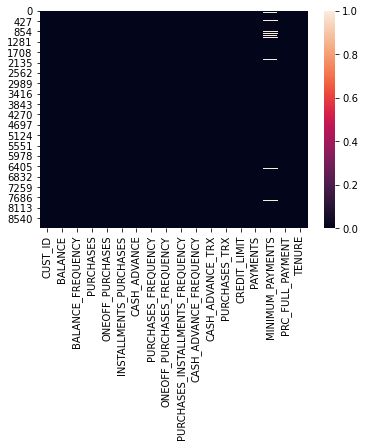

In [10]:
sns.heatmap(data_df.isnull());

In [11]:
data_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
data_df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [13]:
data_df.loc[(data_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data_df['MINIMUM_PAYMENTS'].mean()

In [14]:
data_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [15]:
data_df.loc[(data_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data_df['CREDIT_LIMIT'].mean()

In [16]:
data_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

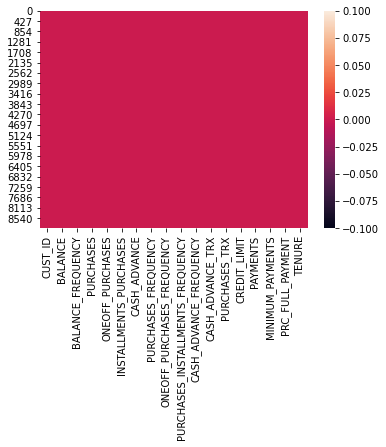

In [17]:
sns.heatmap(data_df.isnull());

In [19]:
data_df.drop('CUST_ID', axis = 1, inplace = True)

In [20]:
data_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
data_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
len(data_df.columns)

17

# Show dataset on graph

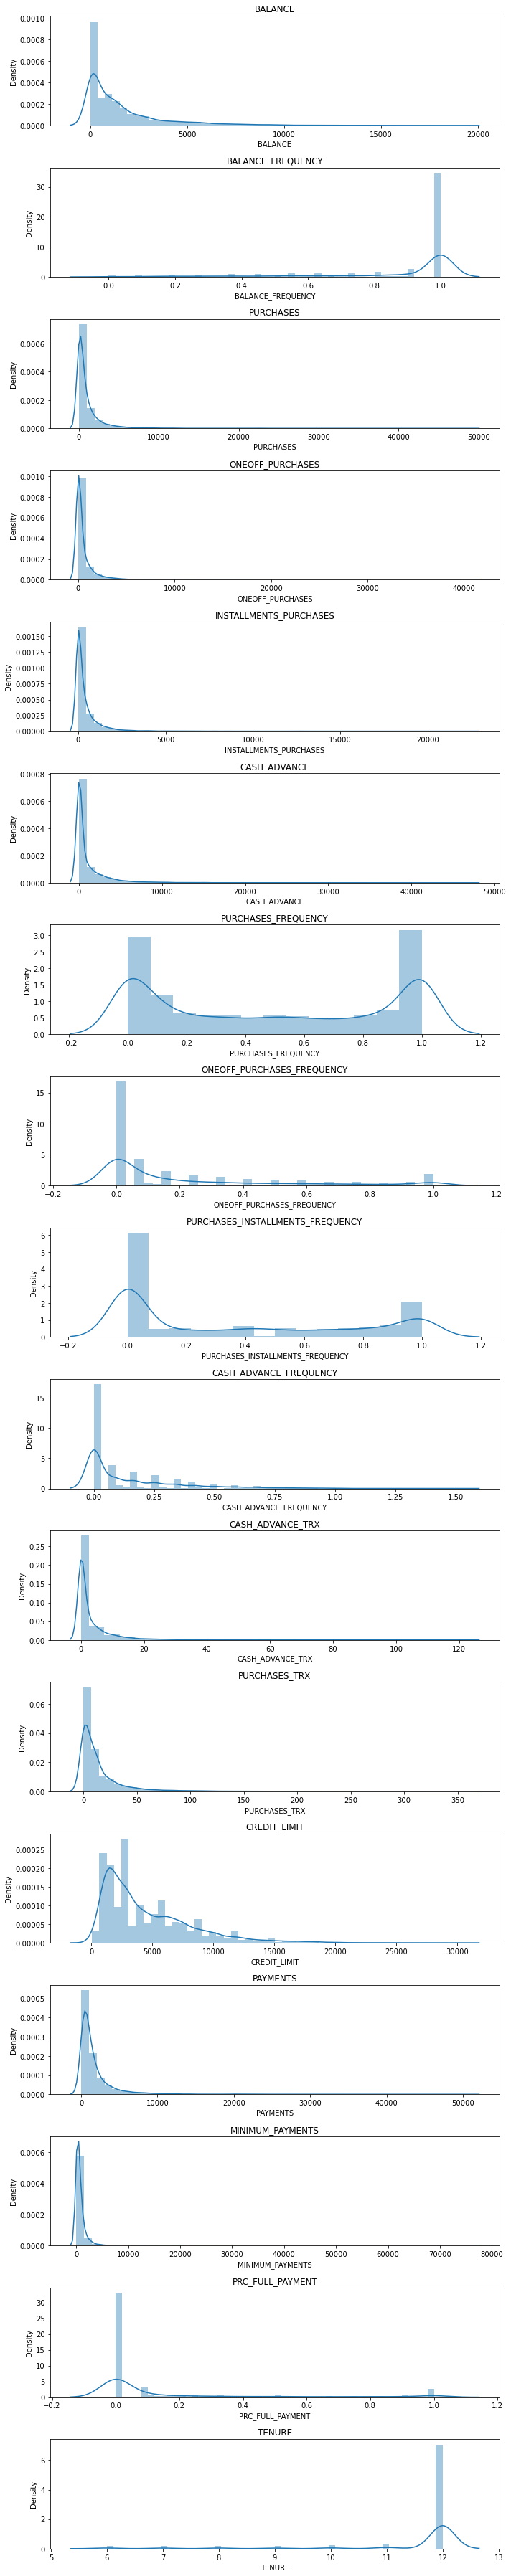

In [23]:
plt.figure(figsize=(10,50))
for i in range(len(data_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(data_df[data_df.columns[i]], kde = True)
  plt.title(data_df.columns[i])
plt.tight_layout();

In [27]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)
data_scaled.shape

(8950, 17)

# Clustering

# Correlation Check

In [29]:
data_imputed = pd.DataFrame(data_scaled, columns=data_df.columns)

<AxesSubplot:>

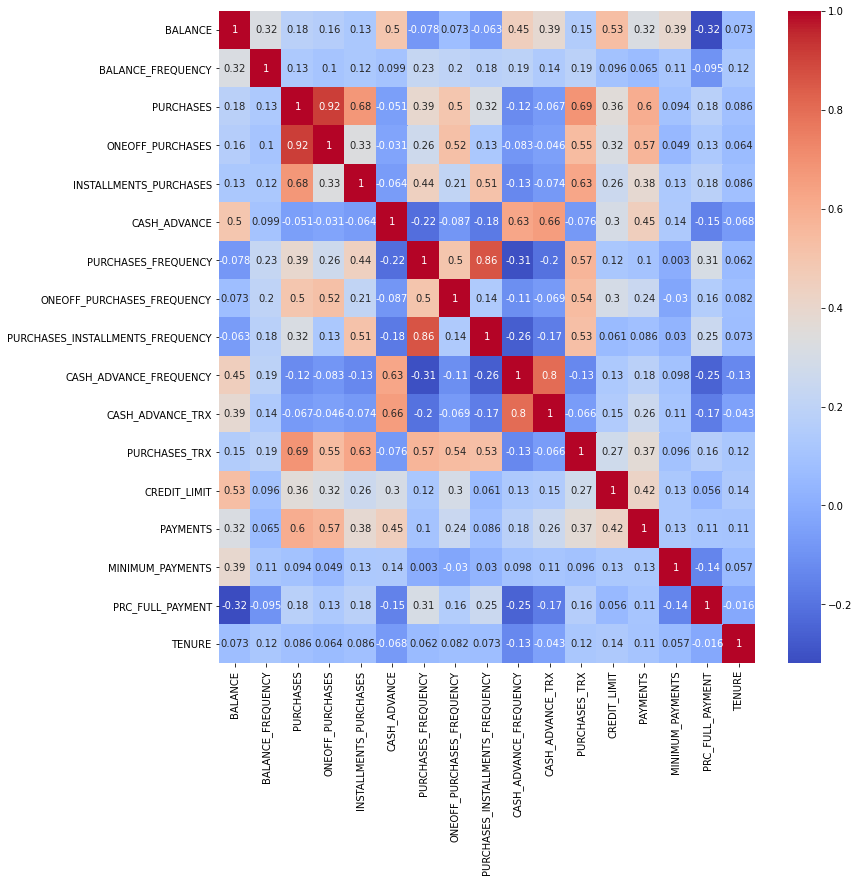

In [30]:
plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

# Inertia Plot

In [31]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

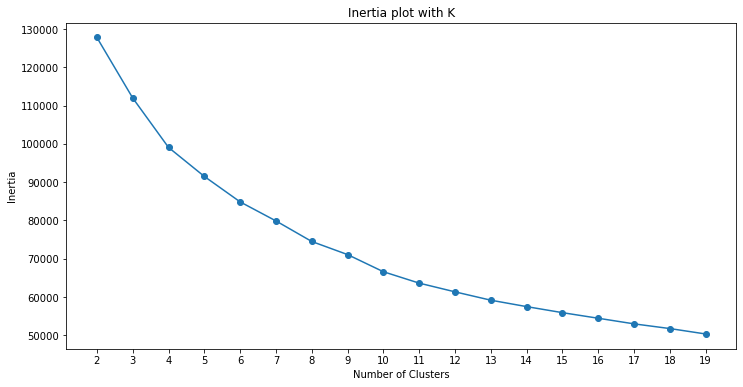

In [32]:
inertia_plot(KMeans, data_imputed)

# Clustering Metrics

In [33]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.46507260687239316        Inertia:  49658.57228557031
Silhouette-Score for 3 Clusters:  0.4523900521472521        Inertia:  33017.54569197597
Silhouette-Score for 4 Clusters:  0.4076674215856402        Inertia:  24524.252175764635
Silhouette-Score for 5 Clusters:  0.40097482507553606        Inertia:  19454.968367264984
Silhouette-Score for 6 Clusters:  0.3848244791201116        Inertia:  16216.60122232116

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.34181430295477777        Inertia:  61968.47560593405
Silhouette-Score for 3 Clusters:  0.37991524984499875        Inertia:  46273.882138058696
Silhouette-Score for 4 Clusters:  0.3702779184727804        Inertia:  34574.22568865519
Silhouette-Score for 5 Clusters:  0.36935888484362367        Inertia:  28501.254644306067
Silhouette-Score for 6 Clusters:  0.33251309146855684        Inertia:  24770.038686006857

PCA with # of components:  4
Silhouette-Score for

# Visualization

Text(0, 0.5, 'PC2')

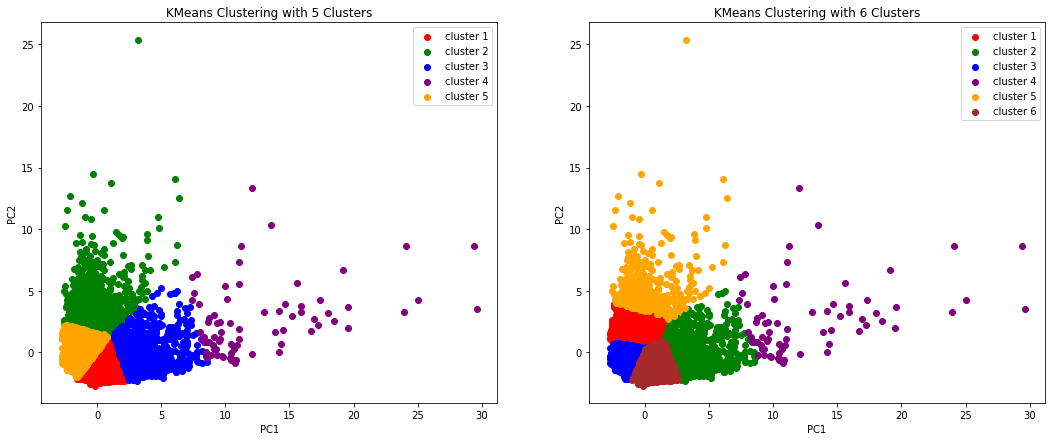

In [34]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Agglomerative Hierarchical Clustering with PCA

Text(0, 0.5, 'PC2')

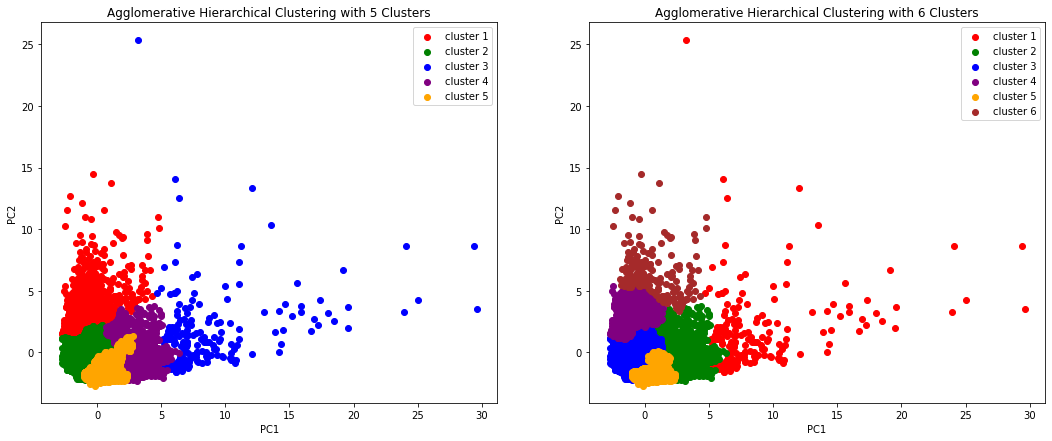

In [35]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Gaussian Mixture Clustering with PCA

Text(0, 0.5, 'PC2')

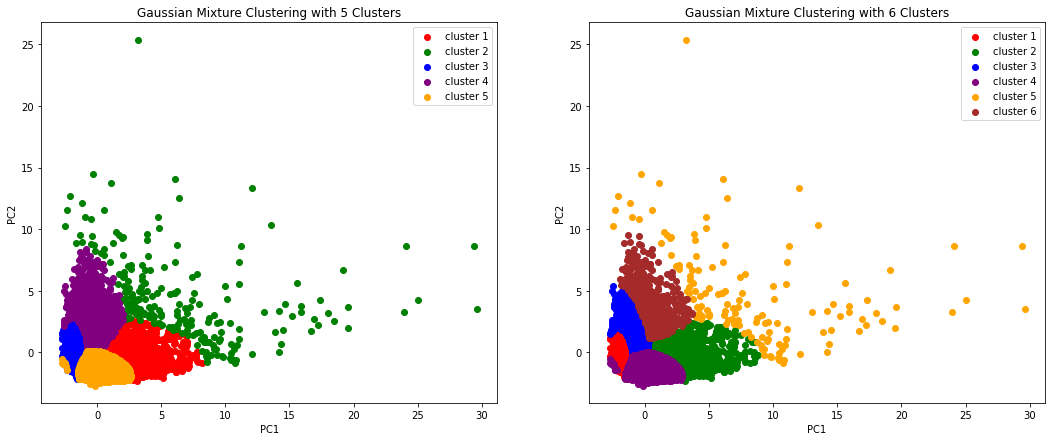

In [36]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Exploratory Data Analysis

In [39]:
# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8950, 6)


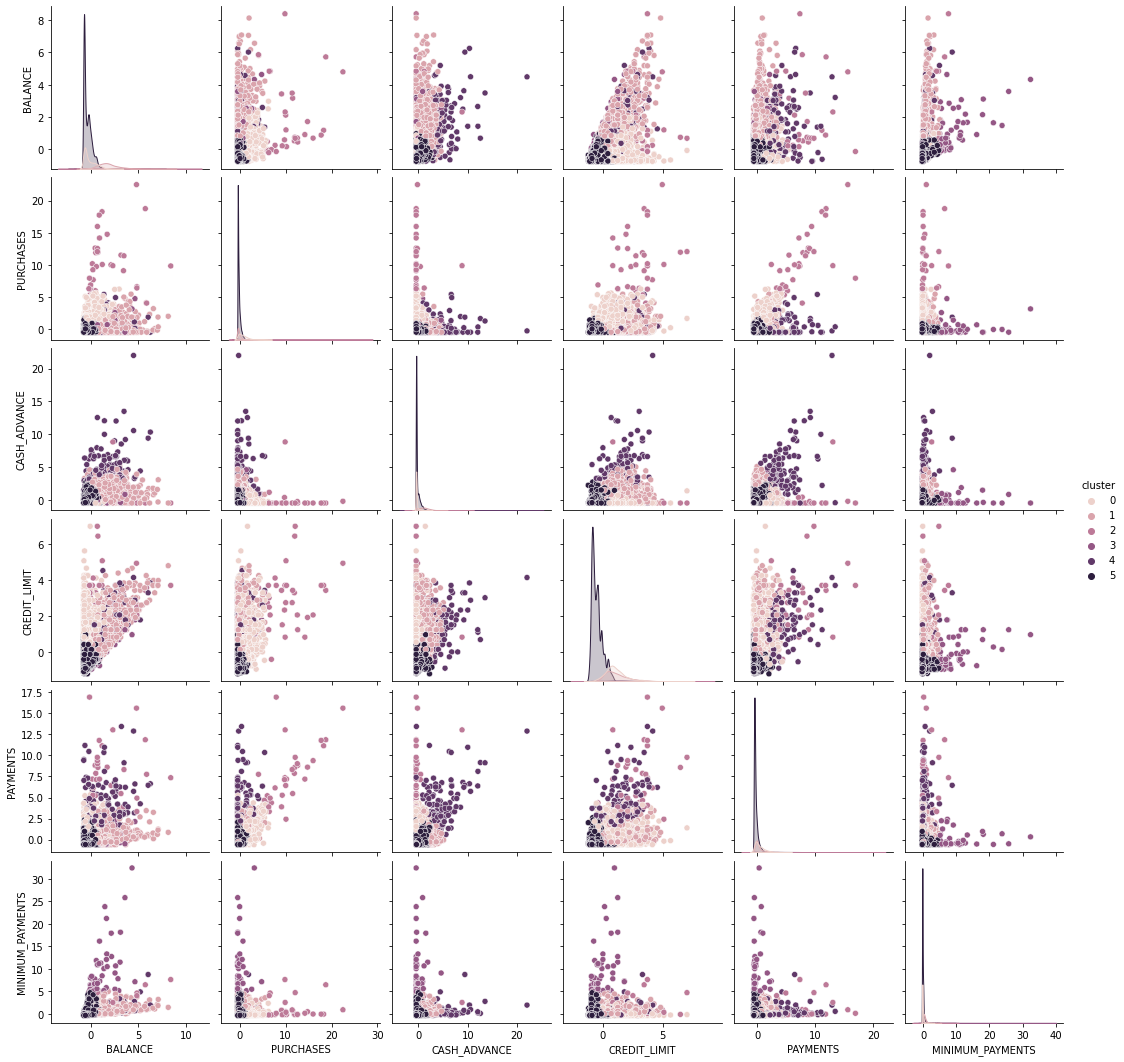

In [49]:
# apply KMeans clustering
alg = KMeans(n_clusters = 6)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster')

# Cluster 

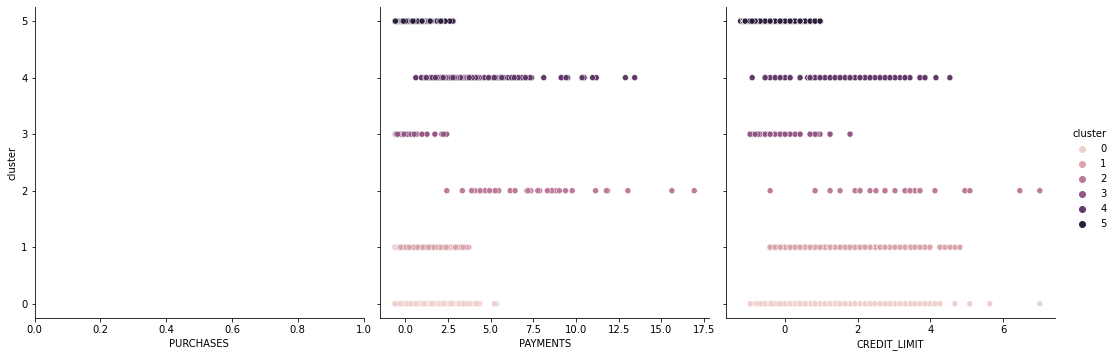

In [50]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT']
             ,y_vars=['cluster'],height=5, aspect=1)

# Silhouette Scores

In [45]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

In [46]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.20995827347598708
Silhouette-Score for 3 Clusters:  0.2499692249286187
Silhouette-Score for 4 Clusters:  0.1976074492720698
Silhouette-Score for 5 Clusters:  0.19324370379425346
Silhouette-Score for 6 Clusters:  0.2023890033166003


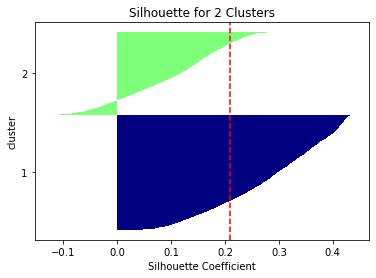

In [47]:
silh_samp_cluster(KMeans, data_imputed, stop=3)

In [59]:
scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(data_df)

In [60]:
min(data_df_scaled[0]), max(data_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [61]:
data_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# k - means clustering

In [62]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [63]:
print(wcss_1)

[152149.99999999878, 127785.0931209031, 111986.19214479765, 99074.46231273624, 91503.04779640742, 84851.29212769285, 79756.43856524282, 75080.68236586054, 69836.89289267718, 66462.00312023229, 63653.177551189896, 61376.293160047295, 59151.4670768, 57502.445139020856, 55932.103787422086, 54268.55226144244, 53450.59280697101, 52061.87194515164, 50781.81310432117]


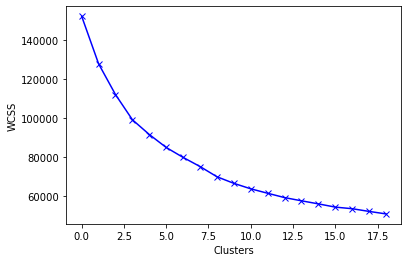

In [64]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [65]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_df_scaled)
labels = kmeans.labels_

In [66]:
labels, len(labels)

(array([1, 6, 0, ..., 5, 5, 5]), 8950)

In [67]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1123, 2766, 1185, 2016,   23,  626,  881,  330], dtype=int64))

In [68]:
kmeans.cluster_centers_

array([[-1.19520697e-01,  4.02972220e-01,  5.64629369e-01,
         6.84799112e-01,  7.67597610e-02, -3.31712479e-01,
         9.97621370e-01,  1.91470623e+00,  2.13123276e-01,
        -4.14625676e-01, -3.31625403e-01,  6.59932711e-01,
         4.60629469e-01,  1.62866482e-01, -1.55242294e-01,
         4.55677400e-01,  2.74023564e-01],
       [ 8.47326052e-03,  4.04717449e-01, -3.54518416e-01,
        -2.39231856e-01, -3.98633701e-01, -9.93878750e-02,
        -8.42047552e-01, -3.84472384e-01, -7.51011125e-01,
         9.38131095e-02, -3.53499391e-02, -4.78168224e-01,
        -3.05744392e-01, -2.51944832e-01, -1.28312315e-02,
        -4.54917393e-01,  2.74532114e-01],
       [-7.00916307e-01, -2.13591944e+00, -3.09789969e-01,
        -2.34351341e-01, -3.01834878e-01, -3.22887417e-01,
        -5.52623132e-01, -4.40210012e-01, -4.38526300e-01,
        -5.22022806e-01, -3.76647980e-01, -4.18105245e-01,
        -1.75015786e-01, -2.01944724e-01, -2.57045690e-01,
         2.84043713e-01,  2.0

In [69]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.119521,0.402972,0.564629,0.684799,0.076760,-0.331712,0.997621,1.914706,0.213123,-0.414626,-0.331625,0.659933,0.460629,0.162866,-0.155242,0.455677,0.274024
1,0.008473,0.404717,-0.354518,-0.239232,-0.398634,-0.099388,-0.842048,-0.384472,-0.751011,0.093813,-0.035350,-0.478168,-0.305744,-0.251945,-0.012831,-0.454917,0.274532
2,-0.700916,-2.135919,-0.309790,-0.234351,-0.301835,-0.322887,-0.552623,-0.440210,-0.438526,-0.522023,-0.376648,-0.418105,-0.175016,-0.201945,-0.257046,0.284044,0.201773
3,-0.358136,0.332525,-0.029540,-0.240590,0.371962,-0.362572,0.997192,-0.380409,1.208509,-0.472004,-0.359611,0.195178,-0.257361,-0.213079,-0.029909,0.314346,0.255466
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
6,1.670578,0.390676,-0.221613,-0.157996,-0.233802,1.997826,-0.482408,-0.214009,-0.422370,1.910244,1.916907,-0.271681,1.014337,0.813195,0.547413,-0.391364,0.071452
7,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772


In [70]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1315.702586,0.972731,2209.544184,1729.063640,480.480544,283.254549,0.890744,0.773652,0.449138,0.052173,0.985727,31.113292,6170.407915,2204.626358,502.420925,0.286992,11.884032
1,1582.111204,0.973145,245.770773,195.361489,50.588135,770.450096,0.152396,0.087762,0.065966,0.153917,3.007589,2.824359,3382.026262,1003.788250,834.303899,0.020659,11.884713
2,105.576699,0.371291,341.333789,203.462143,138.122110,301.761115,0.268556,0.071134,0.190156,0.030682,0.678481,4.317300,3857.670417,1148.533664,265.172405,0.236793,11.787342
3,819.044796,0.956043,940.092395,193.106956,747.428314,218.540823,0.890572,0.088974,0.844730,0.040691,0.794745,19.561230,3558.066535,1116.300204,794.505291,0.245656,11.859197
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
6,5041.641553,0.969818,529.725210,330.197072,199.643541,5168.404620,0.296737,0.138615,0.196577,0.517403,16.330306,7.956867,8185.022186,4087.263771,2139.928792,0.039248,11.612940
7,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
